In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("nasa.csv")
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


# Data Cleaning

## Based on Intuition

We first clean the dataset in order to retain only the relevant information for the project.

First, we will be cleaning data via Intuition : 
- Features **'Name'** and **'Neo Reference ID'** denote the identification number given to the asteroid and are of no use towards the classification process as these features do not contribute in any way towards an asteroid being hazardous or not.

- Feature **'Close Approach Date'** is also unnecessary since this attribute provides us with the date the asteroid will approach Earth, which again has no contribution towards an asteroid being hazardous or not.

- For the above reason, **'Orbit Determination Date'** is also dropped.

In [4]:
df.drop(columns=['Neo Reference ID','Name','Close Approach Date','Orbit Determination Date'],axis=1,inplace=True)

In [5]:
df.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Equinox', 'Hazardous'],
      dtype='object')

In [6]:
df['Orbiting Body'].unique()

array(['Earth'], dtype=object)

In [7]:
df['Equinox'].unique()

array(['J2000'], dtype=object)

As seen from the above two codes, Orbiting Body and Equinox both have only one value in them and thus can be dropped.

In [8]:
df.drop(columns=['Orbiting Body','Equinox'],axis=1,inplace=True)

We now proceed to Statistical Analysis.

## Based on Statistical Analysis

<AxesSubplot: >

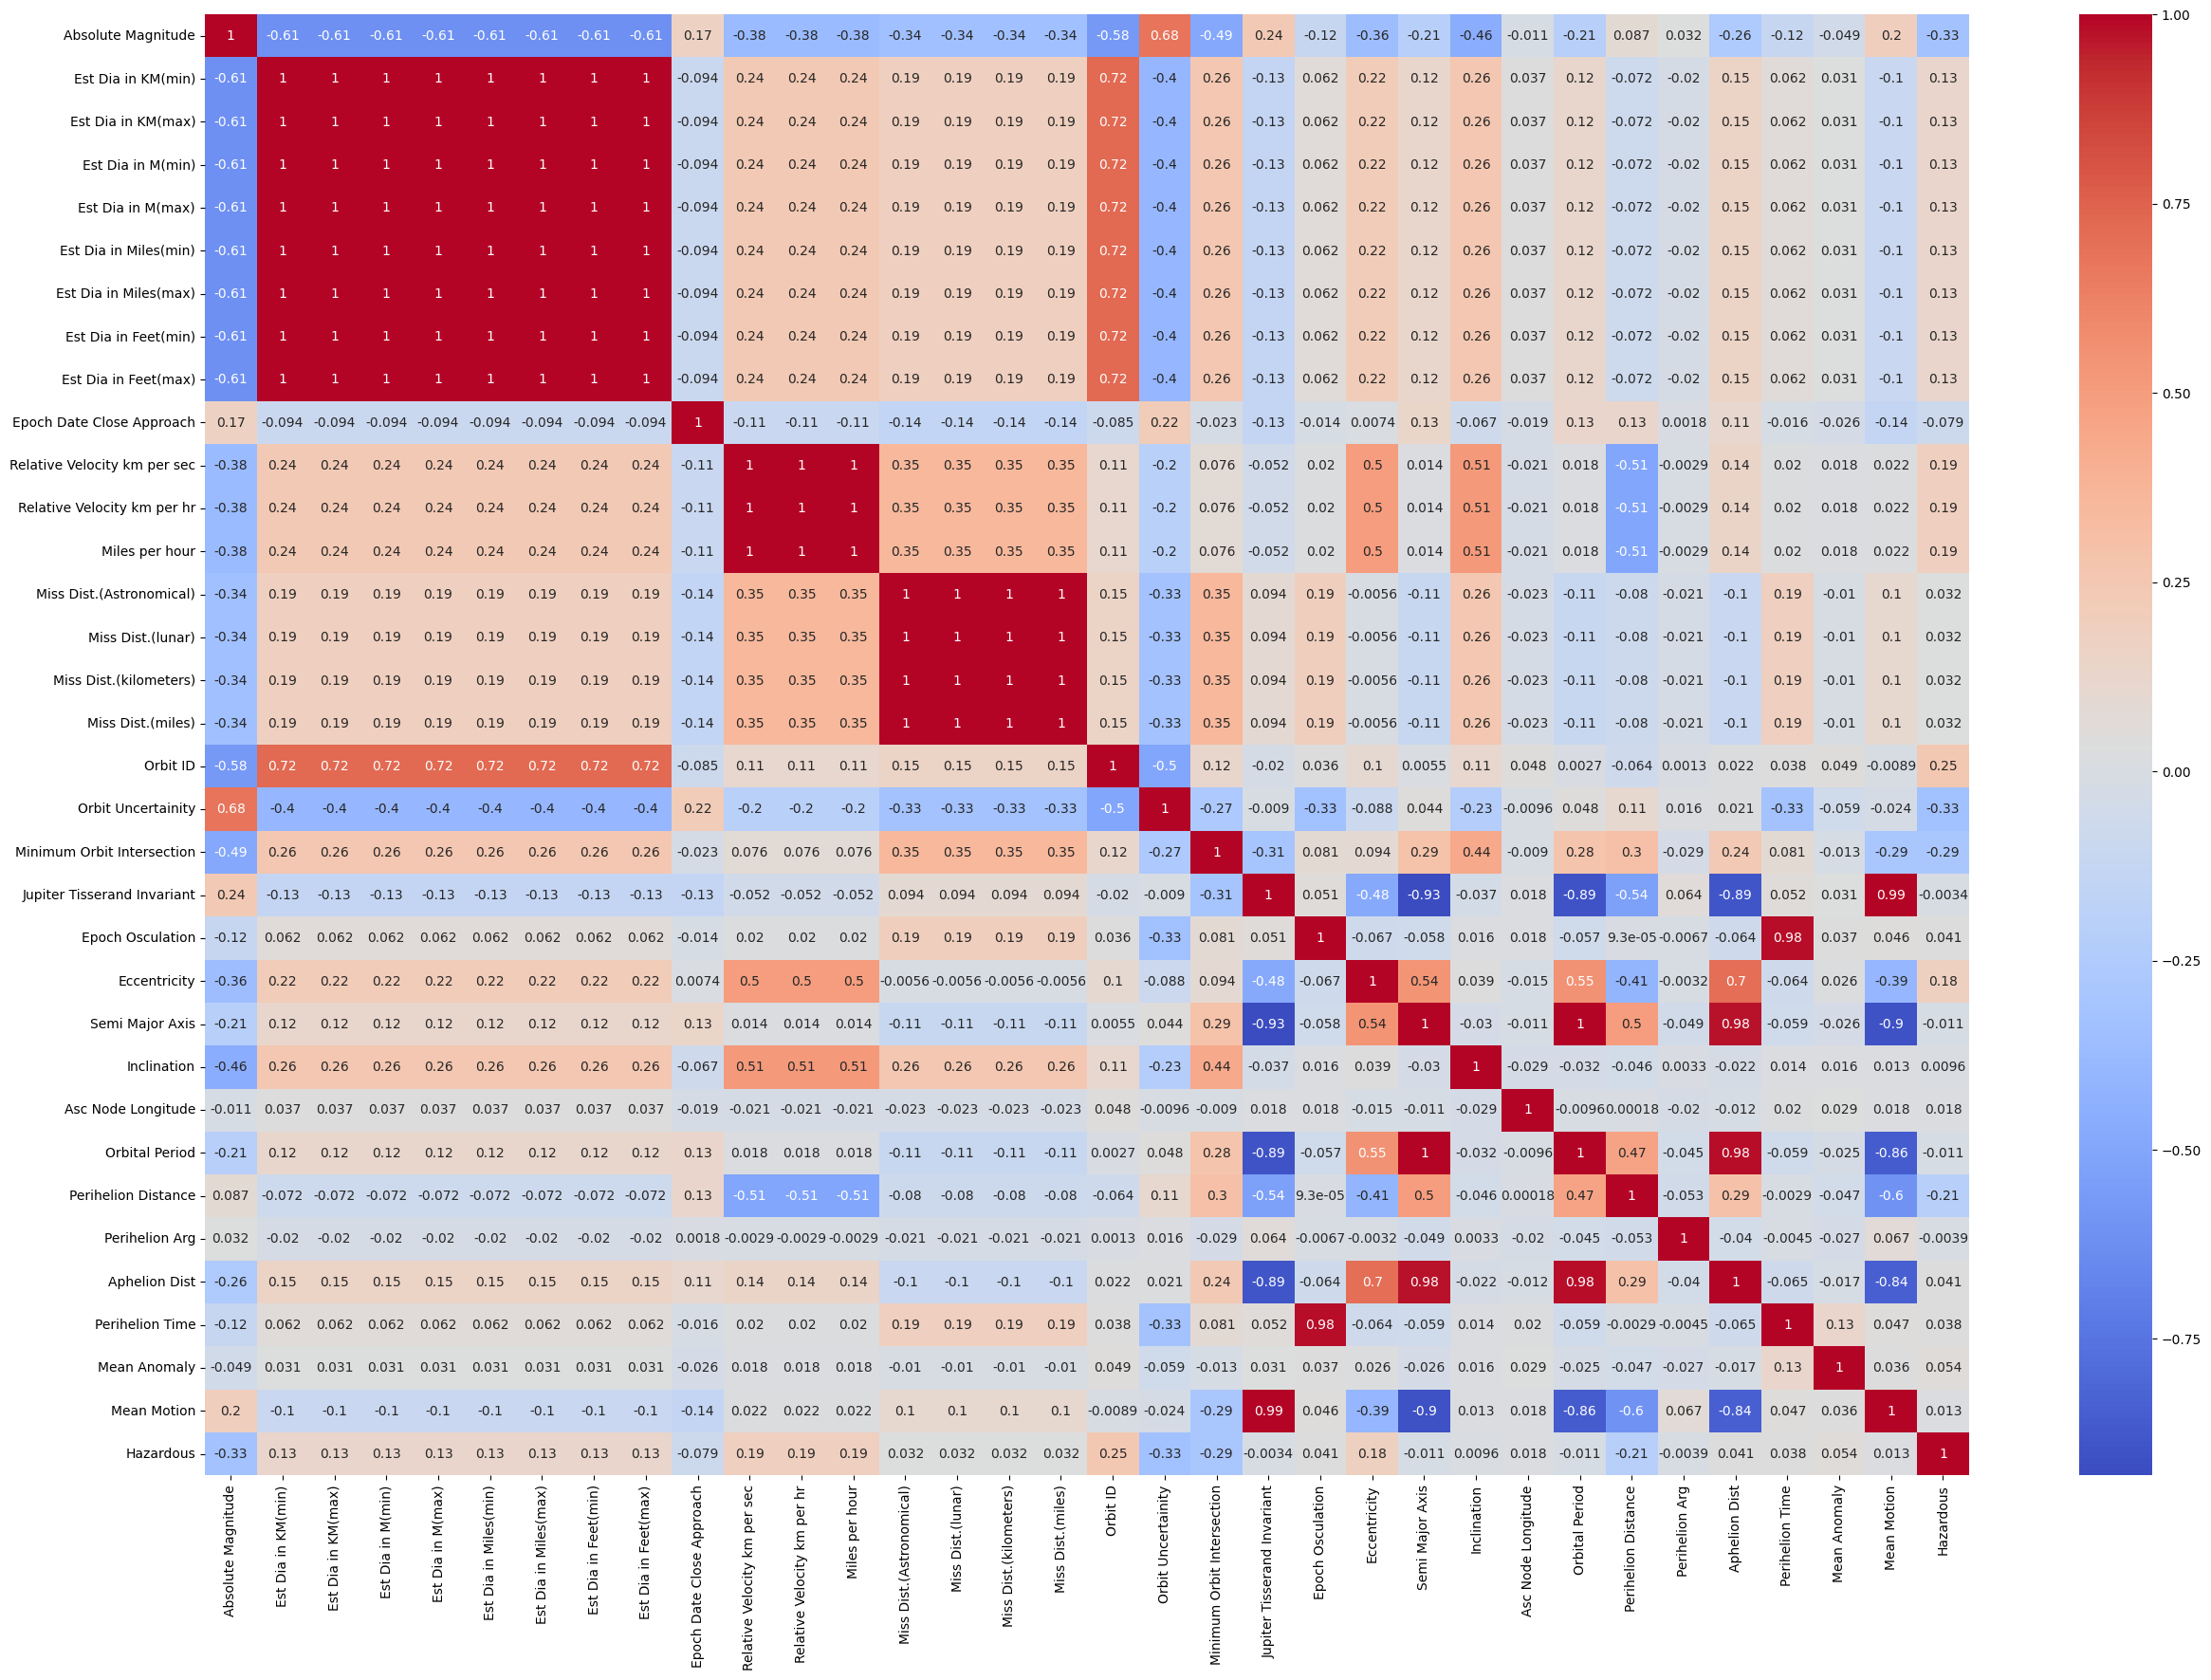

In [9]:
fig,ax = plt.subplots(figsize=(30,20))
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',ax=ax)

The following features : 
- ‘Est Dia in KM(min)’, ‘Est Dia in KM(max)’
- ‘Est Dia in M(min)’, ‘Est Dia in M(max)’
- ‘Est Dia in Miles(min)’, ‘Est Dia in Miles(max)’
- ‘Est Dia in Feet(min)’, ‘Est Dia in Feet(max)’

represent the estimated diameter of the asteroid in different units, i.e. Kilometres (KM), Meters, Miles and Feet. Since all these are redundant data, we keep only one column while dropping the rest. In this case, we keep the Est Dia in KM(min) and Est Dia in KM(max) columns while dropping the rest.

Similarly, the columns : 
- ‘Relative Velocity km per sec’, ‘Relative Velocity km per hr’, ‘Miles per hour’,
    and
- ‘Miss Dist.(Astronomical)’, ‘Miss Dist.(lunar)’, ‘Miss Dist.(kilometers)’, ‘Miss Dist.(miles)’

are also redundant

Thus we keep the following columns : 
- ‘Relative Velocity km per sec’
- ‘Miss Dist.(Astronomical)’

In [10]:
df.drop(columns=['Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Feet(min)','Est Dia in Feet(max)','Relative Velocity km per hr','Miles per hour','Miss Dist.(lunar)', 'Miss Dist.(kilometers)','Miss Dist.(miles)'],inplace=True)

In [11]:
df.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

# Checking the target column

In [12]:
df['Hazardous']

0        True
1       False
2        True
3       False
4        True
        ...  
4682    False
4683    False
4684    False
4685    False
4686    False
Name: Hazardous, Length: 4687, dtype: bool

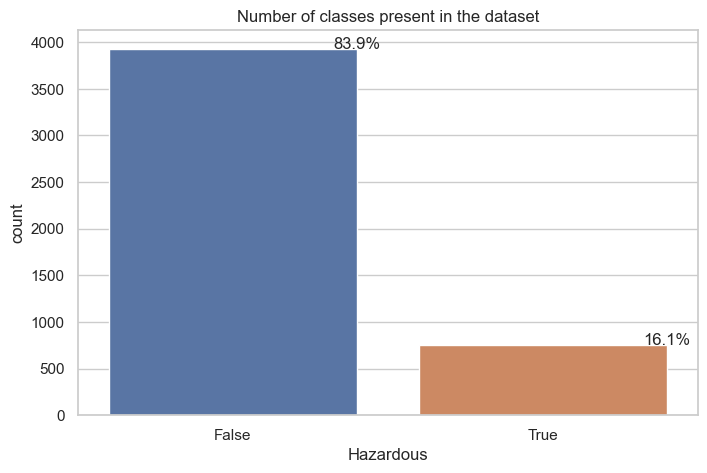

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x=df["Hazardous"])
plt.title("Number of classes present in the dataset")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x()+p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y),ha="center")
plt.show()

In [14]:
df['Hazardous'].value_counts().index

Index([False, True], dtype='bool')

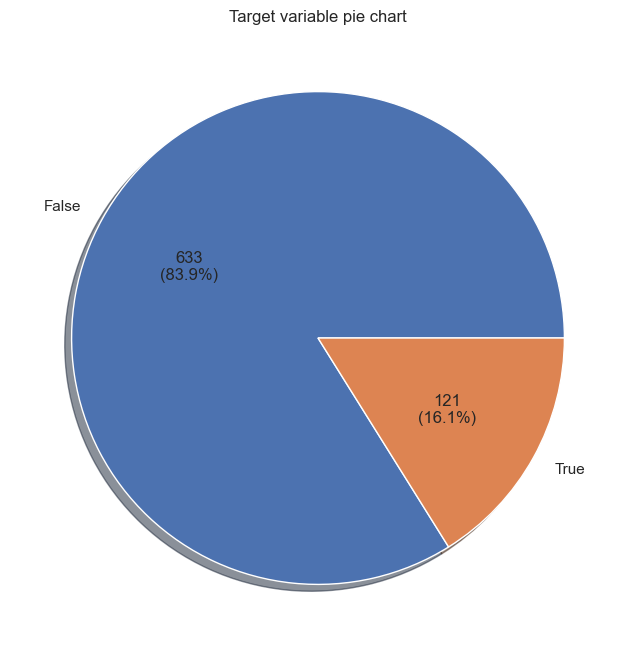

In [15]:
def pie_label(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}\n({:.1f}%)".format(absolute, pct) 
plt.figure(figsize=(10,8))
plt.pie(df['Hazardous'].value_counts(),labels=df['Hazardous'].value_counts().index,autopct=lambda pct: pie_label(pct, df['Hazardous']),shadow=True)
plt.title("Target variable pie chart")
plt.show()

As seen from the above plot, the dataset has a case of imbalanced data,

i.e. the number of False classes is much greater than the True class. 

This will lead to wrong predictions if the data is used as it is, since the classification model will just predict a False class for 83.9% times.

Thus we need to deal with this using appropriate Data Modification techniques

For this we will use two methods
- Random Undersampling
- Random Oversampling

We will use both of these datasets on the models to be developed and then infer the results which come out.

# Splitting the dataset into features and target variables

First, we will replace the values in the Hazardous column by binary encoding of :
- 0 for False
- 1 for True

In [16]:
df['Hazardous'] = df['Hazardous'].astype(int)

In [17]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,788947200000,6.115834,0.419483,17,5,0.025282,4.634,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,788947200000,18.113985,0.383014,21,3,0.186935,5.457,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,789552000000,7.590711,0.050956,22,0,0.043058,4.557,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,790156800000,11.173874,0.285322,7,6,0.005512,5.093,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,790156800000,9.840831,0.407832,25,1,0.034798,5.154,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [18]:
x = df.drop("Hazardous",axis=1)
y = df['Hazardous']

## Performing Undersampling

In [19]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
features_undersample,target_undersample = rus.fit_resample(x,y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(target_undersample))

original dataset shape: Counter({0: 3932, 1: 755})
Resample dataset shape Counter({0: 755, 1: 755})


## Performing Oversampling

In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=True)
features_oversample,target_oversample = ros.fit_resample(x,y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(target_oversample))

original dataset shape: Counter({0: 3932, 1: 755})
Resample dataset shape Counter({1: 3932, 0: 3932})


---

# Data Standardization

Now that our data has been cleaned and corrected, it's time to Standardize the values in the dataset.

First we will split the data into training and testing data.

Here we are going for a 70-30 training to testing split.

In [21]:
from sklearn.model_selection import train_test_split

X_undersample_train,X_undersample_test,y_undersample_train,y_undersample_test = train_test_split(features_undersample,target_undersample,test_size=0.3,random_state=42)
X_oversample_train,X_oversample_test,y_oversample_train,y_oversample_test = train_test_split(features_oversample,target_oversample,test_size=0.3,random_state=42)

Now we will Standardize the data.

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
standard_scaler_undersample = StandardScaler()
standard_scaler_oversample = StandardScaler()
min_max_scaler_undersample = MinMaxScaler(feature_range=(0,1))
min_max_scaler_oversample = MinMaxScaler(feature_range=(0,1))

X_undersample_train = min_max_scaler_undersample.fit_transform(X_undersample_train)
X_undersample_test = min_max_scaler_undersample.transform(X_undersample_test)
X_undersample_train = standard_scaler_undersample.fit_transform(X_undersample_train)
X_undersample_test = standard_scaler_undersample.transform(X_undersample_test)

X_oversample_train = min_max_scaler_oversample.fit_transform(X_oversample_train)
X_oversample_test = min_max_scaler_oversample.transform(X_oversample_test)
X_oversample_train = standard_scaler_oversample.fit_transform(X_oversample_train)
X_oversample_test = standard_scaler_oversample.transform(X_oversample_test)

---

# Model Building

Now that our data has been cleaned and the data standardized, it's time to build the model.

Here we will be going for the following models : 
- LogisticRegression
- SVM
- RandomForestClassifiers
- Classification using ANN

and comparing the results obtained in each of the following.

## Logistic Regression Model

### For Undersampled Data

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_undersample_train,y_undersample_train)
undersample_pred = logreg.predict(X_undersample_test)

In [24]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : ")
confusion_matrix(y_undersample_test,undersample_pred)

Confusion Matrix : 


array([[194,  24],
       [  9, 226]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print("Classification report : ")
print(classification_report(y_undersample_test,undersample_pred))
cf = confusion_matrix(y_undersample_test,undersample_pred)
acc = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0])*100
print("Final Accuracy : ",(round(acc,3)),"%")

Classification report : 
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       218
           1       0.90      0.96      0.93       235

    accuracy                           0.93       453
   macro avg       0.93      0.93      0.93       453
weighted avg       0.93      0.93      0.93       453

Final Accuracy :  92.715 %


In [26]:
print("Log loss value : ",sklearn.metrics.log_loss(y_undersample_test,undersample_pred))

Log loss value :  2.516112166380524


### For Oversampled Data

In [27]:
logreg = LogisticRegression()
logreg.fit(X_oversample_train,y_oversample_train)
oversample_pred = logreg.predict(X_oversample_test)

In [28]:
print("Confusion Matrix : ")
confusion_matrix(y_oversample_test,oversample_pred)

Confusion Matrix : 


array([[1113,   90],
       [  51, 1106]], dtype=int64)

In [29]:
print("Classification report : ")
print(classification_report(y_oversample_test,oversample_pred))
cf = confusion_matrix(y_oversample_test,oversample_pred)
acc = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0])*100
print("Final Accuracy : ",(round(acc,3)),"%")

Classification report : 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1203
           1       0.92      0.96      0.94      1157

    accuracy                           0.94      2360
   macro avg       0.94      0.94      0.94      2360
weighted avg       0.94      0.94      0.94      2360

Final Accuracy :  94.025 %


In [30]:
print("Log loss value : ",sklearn.metrics.log_loss(y_oversample_test,oversample_pred))

Log loss value :  2.063576031970816


---

# SVM

## For undersampled data

In [31]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_undersample_train,y_undersample_train)
undersample_pred = svc.predict(X_undersample_test)

In [32]:
print("Confusion Matrix : ")
confusion_matrix(y_undersample_test,undersample_pred)

Confusion Matrix : 


array([[192,  26],
       [  7, 228]], dtype=int64)

In [33]:
print("Classification report : ")
print(classification_report(y_undersample_test,undersample_pred))
cf = confusion_matrix(y_undersample_test,undersample_pred)
acc = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0])*100
print("Final Accuracy : ",(round(acc,3)),"%")

Classification report : 
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       218
           1       0.90      0.97      0.93       235

    accuracy                           0.93       453
   macro avg       0.93      0.93      0.93       453
weighted avg       0.93      0.93      0.93       453

Final Accuracy :  92.715 %


In [34]:
print("Log loss value : ",sklearn.metrics.log_loss(y_undersample_test,undersample_pred))

Log loss value :  2.5161156966120046


## For oversampled data

In [35]:
svc = SVC(kernel="linear")
svc.fit(X_oversample_train,y_oversample_train)
oversample_pred = svc.predict(X_oversample_test)

In [36]:
print("Confusion Matrix : ")
confusion_matrix(y_oversample_test,oversample_pred)

Confusion Matrix : 


array([[1118,   85],
       [  38, 1119]], dtype=int64)

In [37]:
print("Classification report : ")
print(classification_report(y_oversample_test,oversample_pred))
cf = confusion_matrix(y_oversample_test,oversample_pred)
acc = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0])*100
print("Final Accuracy : ",(round(acc,3)),"%")

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1203
           1       0.93      0.97      0.95      1157

    accuracy                           0.95      2360
   macro avg       0.95      0.95      0.95      2360
weighted avg       0.95      0.95      0.95      2360

Final Accuracy :  94.788 %


In [39]:
print("Log loss value : ",sklearn.metrics.log_loss(y_oversample_test,oversample_pred))

Log loss value :  1.8001429925235521


---

# Random Forest Classifier

## For undersampled data

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion="gini")
rfc.fit(X_undersample_train,y_undersample_train)
undersample_pred = rfc.predict(X_undersample_test)

In [41]:
print("Confusion Matrix : ")
confusion_matrix(y_undersample_test,undersample_pred)

Confusion Matrix : 


array([[217,   1],
       [  0, 235]], dtype=int64)

In [42]:
print("Classification report : ")
print(classification_report(y_undersample_test,undersample_pred))
cf = confusion_matrix(y_undersample_test,undersample_pred)
acc = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0])*100
print("Final Accuracy : ",(round(acc,3)),"%")

Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       235

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

Final Accuracy :  99.779 %


In [43]:
print("Log loss value : ",sklearn.metrics.log_loss(y_undersample_test,undersample_pred))

Log loss value :  0.07624630461885501


## For oversampled data

In [44]:
rfc = RandomForestClassifier(n_estimators=100,criterion="gini")
rfc.fit(X_oversample_train,y_oversample_train)
oversample_pred = rfc.predict(X_oversample_test)

In [45]:
print("Confusion Matrix : ")
confusion_matrix(y_oversample_test,oversample_pred)

Confusion Matrix : 


array([[1200,    3],
       [   0, 1157]], dtype=int64)

In [46]:
print("Classification report : ")
print(classification_report(y_oversample_test,oversample_pred))
cf = confusion_matrix(y_oversample_test,oversample_pred)
acc = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0])*100
print("Final Accuracy : ",(round(acc,3)),"%")

Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1203
           1       1.00      1.00      1.00      1157

    accuracy                           1.00      2360
   macro avg       1.00      1.00      1.00      2360
weighted avg       1.00      1.00      1.00      2360

Final Accuracy :  99.873 %


In [47]:
print("Log loss value : ",sklearn.metrics.log_loss(y_oversample_test,oversample_pred))

Log loss value :  0.043906240668230914


## Trying K fold cross validation

### For undersampled data

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


pipeline = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=100,criterion="gini"))

strtfKFold = StratifiedKFold(n_splits=10)


scores = []

X_undersample_train,X_undersample_test,y_undersample_train,y_undersample_test = train_test_split(features_undersample,target_undersample,test_size=0.3,random_state=42)

kfold = strtfKFold.split(X_undersample_train,y_undersample_train)

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_undersample_train.iloc[train, :], y_undersample_train.iloc[train])
    score = pipeline.score(X_undersample_train.iloc[test, :], y_undersample_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_undersample_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [483 468], Accuracy: 1.000
Fold:  2, Training/Test Split Distribution: [483 468], Accuracy: 0.991
Fold:  3, Training/Test Split Distribution: [483 468], Accuracy: 0.981
Fold:  4, Training/Test Split Distribution: [483 468], Accuracy: 1.000
Fold:  5, Training/Test Split Distribution: [483 468], Accuracy: 1.000
Fold:  6, Training/Test Split Distribution: [483 468], Accuracy: 0.991
Fold:  7, Training/Test Split Distribution: [483 468], Accuracy: 1.000
Fold:  8, Training/Test Split Distribution: [484 468], Accuracy: 1.000
Fold:  9, Training/Test Split Distribution: [484 468], Accuracy: 1.000
Fold: 10, Training/Test Split Distribution: [484 468], Accuracy: 1.000


Cross-Validation accuracy: 0.996 +/- 0.006


### For oversampled data

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


pipeline = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=100,criterion="gini"))

strtfKFold = StratifiedKFold(n_splits=10)


scores = []

X_oversample_train,X_oversample_test,y_oversample_train,y_oversample_test = train_test_split(features_oversample,target_oversample,test_size=0.3,random_state=42)

kfold = strtfKFold.split(X_oversample_train,y_oversample_train)

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_oversample_train.iloc[train, :], y_oversample_train.iloc[train])
    score = pipeline.score(X_oversample_train.iloc[test, :], y_oversample_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_oversample_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



Fold:  1, Training/Test Split Distribution: [2456 2497], Accuracy: 0.998
Fold:  2, Training/Test Split Distribution: [2456 2497], Accuracy: 0.998
Fold:  3, Training/Test Split Distribution: [2456 2497], Accuracy: 0.998
Fold:  4, Training/Test Split Distribution: [2456 2497], Accuracy: 0.996
Fold:  5, Training/Test Split Distribution: [2456 2498], Accuracy: 1.000
Fold:  6, Training/Test Split Distribution: [2456 2498], Accuracy: 1.000
Fold:  7, Training/Test Split Distribution: [2456 2498], Accuracy: 0.998
Fold:  8, Training/Test Split Distribution: [2456 2498], Accuracy: 1.000
Fold:  9, Training/Test Split Distribution: [2456 2498], Accuracy: 0.996
Fold: 10, Training/Test Split Distribution: [2457 2497], Accuracy: 1.000


Cross-Validation accuracy: 0.999 +/- 0.001


Thus, we can see after performing the K fold Cross validation for both the Undersampled and the Oversampled dataset for the Random Forest Classifer, we can see that the model is performing well with a consistent accuracy value for all the 10 folds, thus confirming that we are not seeing any overfitting in the RFC model.

---

# ANN

## For undersampled data

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [51]:
model = Sequential()
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision")
    ]
)

In [52]:
history = model.fit(X_undersample_train,y_undersample_train,epochs=100,validation_data=(X_undersample_test,y_undersample_test),callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=15))

Epoch 1/100
34/34 [==============================] - 2s 17ms/step - loss: 68109791232.0000 - accuracy: 0.4929 - precision: 0.4856 - val_loss: 0.6929 - val_accuracy: 0.5188 - val_precision: 0.5188
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 1080553.5000 - accuracy: 0.4636 - precision: 0.4572 - val_loss: 0.6965 - val_accuracy: 0.4812 - val_precision: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 25597210.0000 - accuracy: 0.5080 - precision: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4812 - val_precision: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 2334833.0000 - accuracy: 0.4901 - precision: 0.4869 - val_loss: 0.6941 - val_accuracy: 0.4812 - val_precision: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 8926598.0000 - accuracy: 0.5080 - precision: 0.5000 - val_loss: 0.6940 - val_accuracy: 0.4812 - val_precision: 0.0000e+00
Epoch 6/100
34/34 [====

In [53]:
predictions = model.predict(X_undersample_test)

15/15 [==============================] - 0s 2ms/step


In [54]:
prediction_classes = [
 1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [55]:
print(confusion_matrix(y_undersample_test, prediction_classes))

[[218   0]
 [235   0]]


In [56]:
print(classification_report(y_undersample_test,prediction_classes))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       218
           1       0.00      0.00      0.00       235

    accuracy                           0.48       453
   macro avg       0.24      0.50      0.32       453
weighted avg       0.23      0.48      0.31       453



C:\Users\Tanay\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanay\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tanay\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
cf = confusion_matrix(y_undersample_test, prediction_classes)
acc = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0])*100
print("Final Accuracy : ",(round(acc,3)),"%")

Final Accuracy :  48.124 %


In [58]:
print("Log loss value : ",sklearn.metrics.log_loss(y_undersample_test,prediction_classes))

Log loss value :  17.917466783231813


## For Oversampled data

In [59]:
model = Sequential()
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
    ]
)

In [60]:
history = model.fit(X_oversample_train,y_oversample_train,epochs=100,validation_data=(X_oversample_test,y_oversample_test),callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=15))

Epoch 1/100
172/172 [==============================] - 3s 10ms/step - loss: 104574877696.0000 - accuracy: 0.5004 - precision: 0.5038 - val_loss: 18237.1406 - val_accuracy: 0.4903 - val_precision: 0.4903
Epoch 2/100
172/172 [==============================] - 1s 7ms/step - loss: 769487.7500 - accuracy: 0.4958 - precision: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.4903 - val_precision: 0.4903
Epoch 3/100
172/172 [==============================] - 1s 7ms/step - loss: 213528.3438 - accuracy: 0.4900 - precision: 0.4961 - val_loss: 0.6939 - val_accuracy: 0.4903 - val_precision: 0.4903
Epoch 4/100
172/172 [==============================] - 1s 8ms/step - loss: 292330.0312 - accuracy: 0.5105 - precision: 0.5121 - val_loss: 0.6957 - val_accuracy: 0.4903 - val_precision: 0.4903
Epoch 5/100
172/172 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5015 - precision: 0.5040 - val_loss: 0.6934 - val_accuracy: 0.4903 - val_precision: 0.4903
Epoch 6/100
172/172 [=============

In [61]:
predictions = model.predict(X_oversample_test)

74/74 [==============================] - 0s 2ms/step


In [62]:
prediction_classes = [
 1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [63]:
print(confusion_matrix(y_oversample_test, prediction_classes))

[[   0 1203]
 [   0 1157]]


In [64]:
import warnings
warnings.filterwarnings('ignore')

print(classification_report(y_oversample_test,prediction_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1203
           1       0.49      1.00      0.66      1157

    accuracy                           0.49      2360
   macro avg       0.25      0.50      0.33      2360
weighted avg       0.24      0.49      0.32      2360



In [65]:
cf = confusion_matrix(y_oversample_test, prediction_classes)
acc = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0])*100
print("Final Accuracy : ",(round(acc,3)),"%")

Final Accuracy :  49.025 %


In [66]:
print("Log loss value : ",sklearn.metrics.log_loss(y_oversample_test,prediction_classes))

Log loss value :  17.606402507960205


The reason we are getting such a poor result for the oversampled data with respect to the Artificial Neural Network is because random oversampling makes the exact copies of the minority class examples, thus often leading to overfitting and ill predictions on the testing data since the classifier constructs rules that are accurate for the training data, but often covers only one replicated example, leading to poor performance on the testing data. 